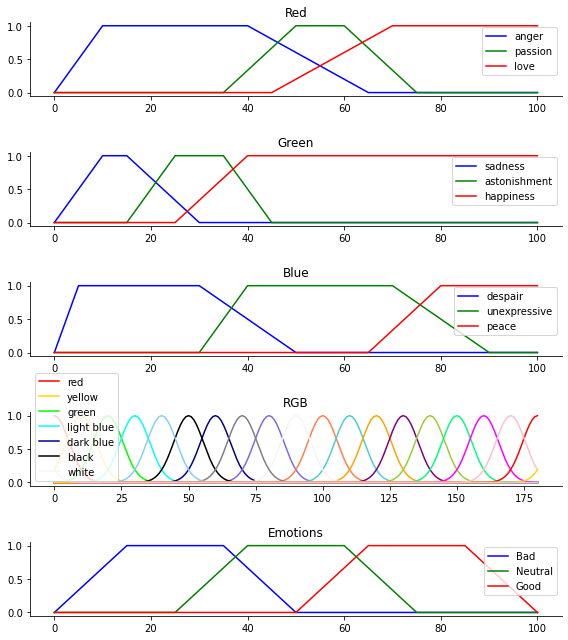

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


# scale of 100

red = np.arange(0, 101, 1)
yellow = np.arange(0, 101, 1)
blue  = np.arange(0, 101, 1)

color_combo = np.arange(0,181,1)
emotion_combo = np.arange(0,101,1)

def guasNotGay(x,dev,mean):
    result = [0] * len(x)
    z = 0
    for y in x:
        a = y - mean
        b = a ** 2
        c = -b
        d = dev ** 2
        e = d * 2
        f = c / e
        ff = np.exp(f)
        result[z] = ff
        z = z + 1  

    return result
def trapNotGay(x,points):
    A = points[0]
    B = points[1]
    C = points[2]
    D = points[3]
    result = [0] * len(x)
    z = 0
    left = 1 / (B - A)

    try: 
        right = 1 / (C-D)
    except ZeroDivisionError:
        right = 0
    for y in x:
        result[z] = 0
        if y > A and y < B:
            result[z] = left * (y - A) 
        elif y >= B and y <= C:
            result[z] = 1
        elif y > C and y < D:
            result[z] = right * (y - D) 
        z = z + 1
    return result
def interpNotGay(x,xmf,xx):

    x1 = x[x <= xx][-1]
    x2 = x[x >= xx][0]
   

    idx1 = np.nonzero(x == x1)[0][0]
    idx2 = np.nonzero(x == x2)[0][0]
          
    xmf1 = xmf[idx1]
    xmf2 = xmf[idx2]
    

    if x1 == x2:
        xxmf = xmf[idx1]
    else:
        slope = (xmf2 - xmf1) / (x2 - x1)
        xxmf = slope * (xx - x1) + xmf1

    return xxmf
    
def defuzzMyRide(x,mfx):
    # mode = mode.lower()
    x = x.ravel()
    mfx = mfx.ravel()
    n = len(x)
    assert n == len(mfx), 'Length of x and fuzzy membership function must be \
                          identical.'

    
    zero_truth_degree = mfx.sum() == 0  # Approximation of total area
    assert not zero_truth_degree, 'Total area is zero in defuzzification!'

    return centroid(x, mfx)
       



def centroid(x,mfx):
    sum_moment_area = 0.0
    sum_area = 0.0

    # If the membership function is a singleton fuzzy set:
    if len(x) == 1:
        return x[0]*mfx[0] / np.fmax(mfx[0], np.finfo(float).eps).astype(float)

    # else return the sum of moment*area/sum of area
    for i in range(1, len(x)):
        x1 = x[i - 1]
        x2 = x[i]
        y1 = mfx[i - 1]
        y2 = mfx[i]

        # if y1 == y2 == 0.0 or x1==x2: --> rectangle of zero height or width
        if not(y1 == y2 == 0.0 or x1 == x2):
            if y1 == y2:  # rectangle
                moment = 0.5 * (x1 + x2)
                area = (x2 - x1) * y1
            elif y1 == 0.0 and y2 != 0.0:  # triangle, height y2
                moment = 2.0 / 3.0 * (x2-x1) + x1
                area = 0.5 * (x2 - x1) * y2
              
            elif y2 == 0.0 and y1 != 0.0:  # triangle, height y1
                moment = 1.0 / 3.0 * (x2 - x1) + x1
                area = 0.5 * (x2 - x1) * y1
               
            else:
                moment = (2.0 / 3.0 * (x2-x1) * (y2 + 0.5*y1)) / (y1+y2) + x1
                area = 0.5 * (x2 - x1) * (y1 + y2)

            sum_moment_area += moment * area
            sum_area += area

    return sum_moment_area / np.fmax(sum_area,
                                     np.finfo(float).eps).astype(float)

#My trap function 

anger = trapNotGay(red, [0, 10,40,65])
passion = trapNotGay(red, [35, 50,60, 75])
love = trapNotGay(red, [45,70 ,100, 100])
sadness = trapNotGay(yellow, [0, 10,15,30])
astonishment = trapNotGay(yellow, [15, 25,35, 45])
happiness = trapNotGay(yellow, [25, 40,100, 100])
despair = trapNotGay(blue, [0, 5,30, 50])
unexpressive = trapNotGay(blue, [30, 40,70, 90])
peace = trapNotGay(blue, [65, 80, 100, 100])
badEmotion = trapNotGay(emotion_combo, [0, 15,35, 50])
neutralEmotion = trapNotGay(emotion_combo, [25, 40,60,75 ])
goodEmotion = trapNotGay(emotion_combo, [50, 65, 85, 100])

#yellowRule,PinkRule,cyanRule,blueRule,redRule,greenRule,whiteRule,blackRule,greyRule,bluePurpleRule,magentaRule,peachRule,turqoiseRule,orangeRule,purpleRule,yellowGreenRule,mintGreenRule,iceblueRule

rgb_red1= guasNotGay(color_combo,5.5,0)
rgb_yellow1 = guasNotGay(color_combo,5.5,10)
rgb_green = guasNotGay(color_combo,5.5,20)
rgb_light_blue = guasNotGay(color_combo,5.5,30)
rgb_dark_blue = guasNotGay(color_combo,5.5,60)
rgb_pink1 = guasNotGay(color_combo,5.5,170)
rgb_red2 = guasNotGay(color_combo,5.5,180)
rgb_pink2 = guasNotGay(color_combo,5.5,-10)
rgb_yellow2 = guasNotGay(color_combo,5.5,190)

rgb_black = guasNotGay(color_combo,5.5,50)
rgb_white = guasNotGay(color_combo,5.5,90)
rgb_grey = guasNotGay(color_combo,5.5,70)

rgb_bluePurple =guasNotGay(color_combo,5.5,80)
rgb_magenta = guasNotGay(color_combo,5.5,160)
rgb_peach = guasNotGay(color_combo,5.5,100)
rgb_turquoise = guasNotGay(color_combo,5.5,110)
rgb_orange = guasNotGay(color_combo,5.5,120)
rgb_purple = guasNotGay(color_combo,5.5,130)
rgb_yellowGreen = guasNotGay(color_combo,5.5,140)
rgb_mintGreen = guasNotGay(color_combo,5.5,150)
rgb_iceBlue = guasNotGay(color_combo,5.5,40)

fig, (ax0, ax1, ax2, ax3,ax4) = plt.subplots(nrows=5, figsize=(8, 9))

ax0.plot(red, anger, 'b', linewidth=1.5, label='anger')
ax0.plot(red, passion, 'g', linewidth=1.5, label='passion')
ax0.plot(red, love, 'r', linewidth=1.5, label='love')
ax0.set_title('Red')
ax0.legend()

ax1.plot(yellow, sadness, 'b', linewidth=1.5, label='sadness')
ax1.plot(yellow, astonishment, 'g', linewidth=1.5, label='astonishment')
ax1.plot(yellow, happiness, 'r', linewidth=1.5, label='happiness')
ax1.set_title('Green')
ax1.legend()

ax2.plot(blue, despair, 'b', linewidth=1.5, label='despair')
ax2.plot(blue, unexpressive, 'g', linewidth=1.5, label='unexpressive')
ax2.plot(blue, peace, 'r', linewidth=1.5, label='peace')
ax2.set_title('Blue')
ax2.legend()

ax3.plot(color_combo, rgb_red1, 'b', linewidth=1.5, label='red',color="red")
ax3.plot(color_combo, rgb_yellow1, 'g', linewidth=1.5, label='yellow',color="gold")
ax3.plot(color_combo, rgb_green, 'r', linewidth=1.5, label='green',color="lime")
ax3.plot(color_combo, rgb_light_blue, 'b', linewidth=1.5, label='light blue',color="cyan")
ax3.plot(color_combo, rgb_dark_blue, 'g', linewidth=1.5, label='dark blue',color="darkblue")
ax3.plot(color_combo, rgb_bluePurple, 'b', linewidth=1.5,color="mediumslateblue")
ax3.plot(color_combo, rgb_peach, 'b', linewidth=1.5,color="coral")
ax3.plot(color_combo, rgb_turquoise, 'g', linewidth=1.5,color="mediumturquoise")
ax3.plot(color_combo, rgb_orange, 'r', linewidth=1.5,color="orange")
ax3.plot(color_combo, rgb_purple, 'b', linewidth=1.5,color="purple")
ax3.plot(color_combo, rgb_yellowGreen, 'g', linewidth=1.5,color="yellowgreen")
ax3.plot(color_combo, rgb_black, 'b', linewidth=1.5, label='black',color="black")
ax3.plot(color_combo, rgb_white, 'g', linewidth=1.5,label = "white", color="whitesmoke")
ax3.plot(color_combo, rgb_grey, 'r', linewidth=1.5,color="grey")
ax3.plot(color_combo, rgb_mintGreen, 'r', linewidth=1.5,color="springgreen")
ax3.plot(color_combo, rgb_iceBlue, 'r', linewidth=1.5,color="lightskyblue")
ax3.plot(color_combo, rgb_magenta, 'g', linewidth=1.5,color="magenta")
ax3.plot(color_combo, rgb_red2, 'r', linewidth=1.5,color="red")
ax3.plot(color_combo, rgb_pink1, 'r', linewidth=1.5,color="pink")
ax3.plot(color_combo, rgb_yellow2, 'r', linewidth=1.5,color="gold")
ax3.plot(color_combo, rgb_pink2, 'r', linewidth=1.5,color="pink")
ax3.set_title('RGB')
ax3.legend()

ax4.plot(emotion_combo, badEmotion, 'b', linewidth=1.5, label='Bad')
ax4.plot(emotion_combo, neutralEmotion, 'g', linewidth=1.5, label='Neutral')
ax4.plot(emotion_combo, goodEmotion, 'r', linewidth=1.5, label='Good')
ax4.set_title('Emotions')
ax4.legend()
# turn off top/right axes
for ax in (ax0, ax1, ax2, ax3,ax4):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()


1
Red emotion membership values
anger:  0
passion:  0.3333333333333333
love:  1


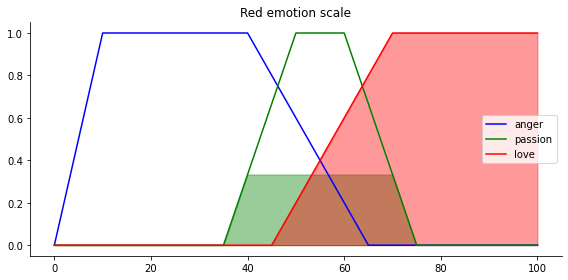

In [2]:
### 79

anger_level = interpNotGay(red, anger, 70)
passion_level = interpNotGay(red, passion, 70)
love_level = interpNotGay(red, love, 70)

print(love_level)
print('Red emotion membership values')
print('anger: ',anger_level)
print('passion: ',passion_level)
print('love: ',love_level)

# visualize these universes and membership functions
fig, ax0 = plt.subplots(nrows=1, figsize=(8, 4))

ax0.plot(red, anger, 'b', linewidth=1.5, label='anger')
anger_degree = np.minimum(anger,anger_level)
ax0.fill_between(red,anger_degree,color="blue",alpha=0.4)

ax0.plot(red, passion, 'g', linewidth=1.5, label='passion')
passion_degree = np.minimum(passion,passion_level)
ax0.fill_between(red,passion_degree,color="green",alpha=0.4)

ax0.plot(red, love, 'r', linewidth=1.5, label='love')
love_degree = np.minimum(love,love_level)
ax0.fill_between(red,love_degree,color="red",alpha=0.4)

ax0.set_title('Red emotion scale')
ax0.legend()

# 
for ax in (ax0, ax1):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

Yellow membership values
sadness:  0.0
astonishment:  0.6500000000000001
happiness:  0.9


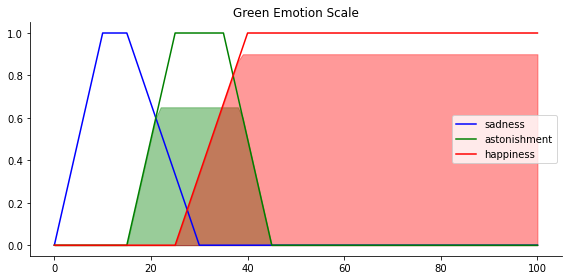

In [3]:
#55
sadness_level = interpNotGay(yellow, sadness, 38.5)
astonishment_level = interpNotGay(yellow, astonishment, 38.5)
happiness_level = interpNotGay(yellow, happiness, 38.5)

print('Yellow membership values')
print('sadness: ',sadness_level)
print('astonishment: ',astonishment_level)
print('happiness: ',happiness_level)

# 
fig, ax1 = plt.subplots(nrows=1, figsize=(8, 4))

ax1.plot(yellow, sadness, 'b', linewidth=1.5, label='sadness')
sadness_degree = np.minimum(sadness,sadness_level)
ax1.fill_between(yellow,sadness_degree,color="blue",alpha=0.4)

ax1.plot(yellow, astonishment, 'g', linewidth=1.5, label='astonishment')
astonishment_degree = np.minimum(astonishment,astonishment_level)
ax1.fill_between(yellow,astonishment_degree,color="green",alpha=0.4)

ax1.plot(yellow, happiness, 'r', linewidth=1.5, label='happiness')
happiness_degree = np.minimum(happiness,happiness_level)
ax1.fill_between(yellow,happiness_degree,color="red",alpha=0.4)

ax1.set_title('Green Emotion Scale')
ax1.legend()

# 
for ax in (ax0, ax1):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

Blue membership values
despair:  0.7000000000000001
unexpressive:  0.6000000000000001
peace:  0
[0.   0.2  0.4  0.6  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7
 0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7
 0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.65 0.6  0.55 0.5  0.45
 0.4  0.35 0.3  0.25 0.2  0.15 0.1  0.05 0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.  ]


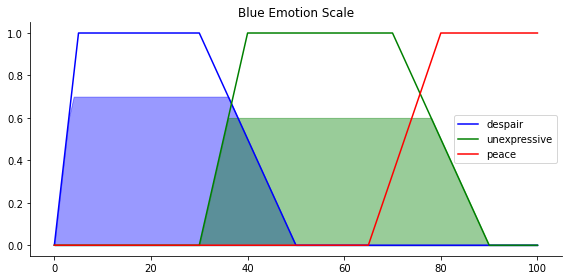

In [4]:
#66
despair_level = interpNotGay(blue, despair, 36)
unexpressive_level = interpNotGay(blue, unexpressive, 36)
peace_level = interpNotGay(blue, peace, 36)

print('Blue membership values')
print('despair: ',despair_level)
print('unexpressive: ',unexpressive_level)
print('peace: ',peace_level)


fig, ax1 = plt.subplots(nrows=1, figsize=(8, 4))

ax1.plot(blue, despair, 'b', linewidth=1.5, label='despair')
despair_degree = np.minimum(despair,despair_level)
ax1.fill_between(blue,despair_degree,color="blue",alpha=0.4)
print(despair_degree)
ax1.plot(blue, unexpressive, 'g', linewidth=1.5, label='unexpressive')
unexpressive_degree = np.minimum(unexpressive,unexpressive_level)
ax1.fill_between(blue,unexpressive_degree,color="green",alpha=0.4)
ax1.plot(blue, peace, 'r', linewidth=1.5, label='peace')
peace_degree = np.minimum(peace,peace_level)
ax1.fill_between(blue,peace_degree,color="red",alpha=0.4)

ax1.set_title('Blue Emotion Scale')
ax1.legend()


for ax in (ax0, ax1):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


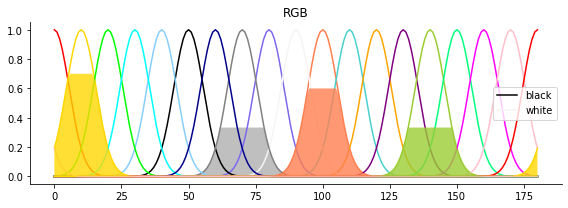

In [7]:
################################################
totalRules = [0] * 18

#yellow
yellowRule = np.fmin(love_level,  np.fmin(happiness_level, despair_level))
yellowTotal = np.fmin(yellowRule,rgb_yellow1)
yellowTotal2 = np.fmin(yellowRule,rgb_yellow2)

#pink
pinkRule = np.fmin(love_level, np.fmin(sadness_level, peace_level))
pinkTotal = np.fmin(pinkRule,rgb_pink1)
pinkTotal2 = np.fmin(pinkRule,rgb_pink2)
#cyan
cyanRule = np.fmin(peace_level,  np.fmin(happiness_level, anger_level)) 
cyanTotal = np.fmin(cyanRule,rgb_light_blue)
#Blue 
blueRule = np.fmin(anger_level,  np.fmin(sadness_level, peace_level))
blueTotal = np.fmin(blueRule,rgb_dark_blue)
#red
redRule = np.fmin(sadness_level,  np.fmin(despair_level, love_level))
redTotal = np.fmin(redRule,rgb_red1)
redTotal2 = np.fmin(redRule,rgb_red2)
#green
greenRule = np.fmin(anger_level,  np.fmin(despair_level, happiness_level))
greenTotal = np.fmin(greenRule,rgb_green)

#white
whiteRule =  np.fmin(love_level, np.fmin(peace_level, happiness_level))
whiteTotal = np.fmin(whiteRule,rgb_white)
#black
blackRule =  np.fmin(anger_level, np.fmin(despair_level, sadness_level))
blackTotal = np.fmin(blackRule,rgb_black)
#grey
greyRule =  np.fmin(passion_level, np.fmin(astonishment_level, unexpressive_level))
greyTotal = np.fmin(greyRule,rgb_grey)
#blue Purple
bluePurpleRule =  np.fmin(passion_level, np.fmin(astonishment_level, peace_level))
bluePurpleTotal = np.fmin(bluePurpleRule,rgb_bluePurple)
#magenta
magentaRule =  np.fmin(passion_level, np.fmin(sadness_level, unexpressive_level))
magentaTotal = np.fmin(magentaRule,rgb_magenta)
#peach
peachRule =  np.fmin(love_level, np.fmin(astonishment_level, unexpressive_level))
peachTotal = np.fmin(peachRule,rgb_peach)
#turquoise
turqoiseRule =  np.fmin(anger_level, np.fmin(astonishment_level, unexpressive_level))
turqoiseTotal = np.fmin(turqoiseRule,rgb_turquoise)
#orange
orangeRule =  np.fmin(love_level, np.fmin(astonishment_level, sadness_level))
orangeTotal = np.fmin(orangeRule,rgb_orange)
#purple
purpleRule =  np.fmin(passion_level, np.fmin(sadness_level, peace_level))
purpleTotal = np.fmin(purpleRule,rgb_purple)
#yellowgreen
yellowGreenRule =  np.fmin(passion_level, np.fmin(happiness_level, despair_level))
yellowGreenTotal = np.fmin(yellowGreenRule,rgb_yellowGreen)
#mint green
mintGreenRule =  np.fmin(anger_level, np.fmin(happiness_level, unexpressive_level))
mintGreenTotal = np.fmin(mintGreenRule,rgb_mintGreen)
#ice blue
iceblueRule =  np.fmin(passion_level, np.fmin(peace_level, happiness_level))
iceBlueTotal = np.fmin(iceblueRule,rgb_iceBlue)



#total rules
#totalRules = [yellowRule,pinkRule,cyanRule,blueRule,redRule,greenRule,whiteRule,blackRule,greyRule,bluePurpleRule,magentaRule,peachRule,turqoiseRule,orangeRule,purpleRule,yellowGreenRule,mintGreenRule,iceblueRule]

colorName = ['yellow','Pink','cyan','blue','red','green','white','black','grey','bluePurple','magenta','peach','turqoise','orange','purple','yellowGreen','mintGreen','iceblue']
count=0
tots = 0
realColor = ""
for x in totalRules:
    
    if x > tots:
        tots = x
        realColor = colorName[count]
    count = count + 1 


print(totalRules)


#visualize this
fig, ax3 = plt.subplots(figsize=(8, 3))

ax3.plot(color_combo, rgb_red1, 'b', linewidth=1.5, label='',color="red",zorder=5)
ax3.fill_between(color_combo, redTotal, facecolor='red', alpha=0.8, zorder=10)

ax3.plot(color_combo, rgb_yellow1, 'g', linewidth=1.5, label='',color="gold",zorder=5)
ax3.fill_between(color_combo,yellowTotal, 0,facecolor='gold', alpha= 0.8,zorder=10)

ax3.plot(color_combo, rgb_green, 'r', linewidth=1.5, label='',color="lime",zorder=5)
ax3.fill_between(color_combo, greenTotal, 0, facecolor='lime', alpha=0.8,zorder=10)

ax3.plot(color_combo, rgb_light_blue, 'b', linewidth=1.5, label='',color="cyan",zorder=5)
ax3.fill_between(color_combo, cyanTotal, 0, facecolor='cyan', alpha=0.8,zorder=10)

ax3.plot(color_combo, rgb_dark_blue, 'g', linewidth=1.5, label='',color="darkblue",zorder=5)
ax3.fill_between(color_combo, blueTotal, 0, facecolor='darkblue', alpha=0.8,zorder=5)

ax3.plot(color_combo, rgb_bluePurple, 'b', linewidth=1.5,color="mediumslateblue",zorder=1)
ax3.fill_between(color_combo,bluePurpleTotal , 0, facecolor='mediumslateblue', alpha=0.8,zorder=10)

ax3.plot(color_combo, rgb_peach, 'b', linewidth=1.5,color="coral",zorder=1)
ax3.fill_between(color_combo,peachTotal , 0, facecolor='coral', alpha=0.8,zorder=10)

ax3.plot(color_combo, rgb_turquoise, 'g', linewidth=1.5,color="mediumturquoise",zorder=1)
ax3.fill_between(color_combo,turqoiseTotal , 0, facecolor='mediumturquoise', alpha=0.8,zorder=10)

ax3.plot(color_combo, rgb_orange, 'r', linewidth=1.5,color="orange",zorder=1)
ax3.fill_between(color_combo,orangeTotal , 0, facecolor='orange', alpha=0.8,zorder=10)

ax3.plot(color_combo, rgb_purple, 'b', linewidth=1.5,color="purple",zorder=1)
ax3.fill_between(color_combo,purpleTotal , 0, facecolor='purple', alpha=0.8,zorder=5)

ax3.plot(color_combo, rgb_yellowGreen, 'g', linewidth=1.5,color="yellowgreen",zorder=1)
ax3.fill_between(color_combo,yellowGreenTotal , 0, facecolor='yellowgreen', alpha=0.8,zorder=10)

ax3.plot(color_combo, rgb_black, 'b', linewidth=1.5, label='black',color="black",zorder=1)
ax3.fill_between(color_combo,blackTotal , 0, facecolor='black', alpha=0.8,zorder=-1)

ax3.plot(color_combo, rgb_white, 'g', linewidth=1.5,label = "white", color="whitesmoke",zorder=1)
ax3.fill_between(color_combo,whiteTotal , 0, facecolor='whitesmoke', alpha=0.9,zorder=10)

ax3.plot(color_combo, rgb_grey, 'r', linewidth=1.5,color="grey",zorder=1)
ax3.fill_between(color_combo,greyTotal , 0, facecolor='grey', alpha=0.5,zorder=1)

ax3.plot(color_combo, rgb_mintGreen, 'r', linewidth=1.5,color="springgreen",zorder=1)
ax3.fill_between(color_combo, mintGreenTotal, 0, facecolor='springgreen', alpha=0.8,zorder=10)

ax3.plot(color_combo, rgb_iceBlue, 'r', linewidth=1.5,color="lightskyblue",zorder=1)
ax3.fill_between(color_combo, iceBlueTotal, 0, facecolor='lightskyblue', alpha=0.8,zorder=10)

ax3.plot(color_combo, rgb_magenta, 'g', linewidth=1.5,color="magenta",zorder=1)
ax3.fill_between(color_combo,magentaTotal , 0, facecolor='magenta', alpha=0.8,zorder=9)



ax3.plot(color_combo, rgb_pink1, 'r', linewidth=1.5, label='',color="pink",zorder=5)
ax3.fill_between(color_combo, pinkTotal, 0, facecolor='pink', alpha=0.8,zorder=10)

ax3.plot(color_combo, rgb_red2, 'r', linewidth=1.5,color="red",zorder=5)
ax3.fill_between(color_combo, redTotal2, 0, facecolor='red', alpha=0.8,zorder=10)

ax3.plot(color_combo, rgb_yellow2, 'r', linewidth=1.5,color="gold",zorder=5)
ax3.fill_between(color_combo, yellowTotal2, 0, facecolor='gold', alpha=0.8,zorder=10)

ax3.plot(color_combo, rgb_pink2, 'r', linewidth=1.5,color="pink",zorder=5)
ax3.fill_between(color_combo, pinkTotal2, 0, facecolor='pink', alpha=0.8,zorder=10)

ax3.set_title('RGB')
ax3.legend()


for ax in (ax3,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

0.3333333333333333
75.56184961467832
7
you match grey color by : 33.33333333333333 %


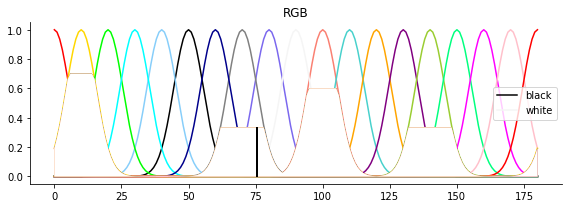

In [496]:

arrayColors = [yellowTotal,pinkTotal,cyanTotal,blueTotal,redTotal,greenTotal,whiteTotal,blackTotal,greyTotal,bluePurpleTotal,magentaTotal,peachTotal,turqoiseTotal,orangeTotal,purpleTotal,yellowGreenTotal,mintGreenTotal,iceBlueTotal]

#Sum and max 

aggregated = np.fmax(np.add(yellowTotal,yellowTotal2),np.fmax(np.add(pinkTotal,pinkTotal2),np.fmax(np.add(redTotal,redTotal2),np.fmax(cyanTotal,np.fmax(blueTotal,np.fmax(greenTotal,np.fmax(whiteTotal,np.fmax(blackTotal,np.fmax(greyTotal,np.fmax(bluePurpleTotal,np.fmax(magentaTotal,np.fmax(peachTotal,np.fmax(turqoiseTotal,np.fmax(orangeTotal,np.fmax(purpleTotal,np.fmax(yellowGreenTotal,np.fmax(mintGreenTotal,iceBlueTotal)))))))))))))))))
color = defuzzMyRide(color_combo, aggregated)
colorFinal = interpNotGay(color_combo, aggregated, color) 




####################
fig, ax3 = plt.subplots(figsize=(8, 3))
###############
ax3.plot(color_combo, rgb_red1, 'b', linewidth=1.5, label='',color="red",zorder=5)
ax3.fill_between(color_combo, redTotal, aggregated, facecolor='red', alpha=0.8, zorder=10)

ax3.plot(color_combo, rgb_yellow1, 'g', linewidth=1.5, label='',color="gold",zorder=5)
ax3.fill_between(color_combo,yellowTotal, aggregated,facecolor='gold', alpha= 0.8,zorder=10)

ax3.plot(color_combo, rgb_green, 'r', linewidth=1.5, label='',color="lime",zorder=5)
ax3.fill_between(color_combo, greenTotal, aggregated, facecolor='lime', alpha=0.8,zorder=10)

ax3.plot(color_combo, rgb_light_blue, 'b', linewidth=1.5, label='',color="cyan",zorder=5)
ax3.fill_between(color_combo, cyanTotal, aggregated, facecolor='cyan', alpha=0.8,zorder=10)

ax3.plot(color_combo, rgb_dark_blue, 'g', linewidth=1.5, label='',color="darkblue",zorder=5)
ax3.fill_between(color_combo, blueTotal, aggregated, facecolor='darkblue', alpha=0.8,zorder=5)

ax3.plot(color_combo, rgb_bluePurple, 'b', linewidth=1.5,color="mediumslateblue",zorder=1)
ax3.fill_between(color_combo,bluePurpleTotal , aggregated, facecolor='mediumslateblue', alpha=0.8,zorder=10)

ax3.plot(color_combo, rgb_peach, 'b', linewidth=1.5,color="salmon",zorder=1)
ax3.fill_between(color_combo,peachTotal , aggregated, facecolor='salmon', alpha=0.8,zorder=10)

ax3.plot(color_combo, rgb_turquoise, 'g', linewidth=1.5,color="mediumturquoise",zorder=1)
ax3.fill_between(color_combo,turqoiseTotal , aggregated, facecolor='mediumturquoise', alpha=0.8,zorder=10)

ax3.plot(color_combo, rgb_orange, 'r', linewidth=1.5,color="orange",zorder=1)
ax3.fill_between(color_combo,orangeTotal , aggregated, facecolor='orange', alpha=0.8,zorder=10)

ax3.plot(color_combo, rgb_purple, 'b', linewidth=1.5,color="purple",zorder=1)
ax3.fill_between(color_combo,purpleTotal , aggregated, facecolor='purple', alpha=0.8,zorder=5)

ax3.plot(color_combo, rgb_yellowGreen, 'g', linewidth=1.5,color="yellowgreen",zorder=1)
ax3.fill_between(color_combo,yellowGreenTotal , aggregated, facecolor='yellowgreen', alpha=0.8,zorder=10)

ax3.plot(color_combo, rgb_black, 'b', linewidth=1.5, label='black',color="black",zorder=1)
ax3.fill_between(color_combo,blackTotal , aggregated, facecolor='black', alpha=0.8,zorder=-1)

ax3.plot(color_combo, rgb_white, 'g', linewidth=1.5,label = "white", color="whitesmoke",zorder=1)
ax3.fill_between(color_combo,whiteTotal , aggregated, facecolor='whitesmoke', alpha=0.8,zorder=10)

ax3.plot(color_combo, rgb_grey, 'r', linewidth=1.5,color="grey",zorder=1)
ax3.fill_between(color_combo,greyTotal , aggregated, facecolor='grey', alpha=0.5,zorder=1)

ax3.plot(color_combo, rgb_mintGreen, 'r', linewidth=1.5,color="springgreen",zorder=1)
ax3.fill_between(color_combo, mintGreenTotal, aggregated, facecolor='springgreen', alpha=0.8,zorder=10)

ax3.plot(color_combo, rgb_iceBlue, 'r', linewidth=1.5,color="lightskyblue",zorder=1)
ax3.fill_between(color_combo, iceBlueTotal, aggregated, facecolor='lightskyblue', alpha=0.8,zorder=10)

ax3.plot(color_combo, rgb_magenta, 'g', linewidth=1.5,color="magenta",zorder=1)
ax3.fill_between(color_combo,magentaTotal , aggregated, facecolor='magenta', alpha=0.8,zorder=9)



ax3.plot(color_combo, rgb_pink1, 'r', linewidth=1.5, label='',color="pink",zorder=5)
ax3.fill_between(color_combo, pinkTotal, aggregated, facecolor='pink', alpha=0.8,zorder=10)

ax3.plot(color_combo, rgb_red2, 'r', linewidth=1.5,color="red",zorder=5)
ax3.fill_between(color_combo, redTotal2, aggregated, facecolor='red', alpha=0.8,zorder=10)

ax3.plot(color_combo, rgb_yellow2, 'r', linewidth=1.5,color="gold",zorder=5)
ax3.fill_between(color_combo, yellowTotal2, aggregated, facecolor='gold', alpha=0.8,zorder=10)

ax3.plot(color_combo, rgb_pink2, 'r', linewidth=1.5,color="pink",zorder=5)
ax3.fill_between(color_combo, pinkTotal2, aggregated, facecolor='pink', alpha=0.8,zorder=10)

ax3.fill_between(color_combo, 0, aggregated, facecolor='white', alpha=1,zorder=10)
ax3.plot([color, color], [0, colorFinal], 'k', linewidth=2, color ="black",alpha=1,zorder = 100)
ax3.set_title('RGB')
ax3.legend()

print(colorFinal)
print(color)
print(int(color/10))
print("you match",colorName[int(color/10)+1],"color by :",colorFinal*100,"%" )
###############

for ax in (ax3,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()